In [30]:
import numpy as np  
import pandas as pd 
import seaborn as sns
import sklearn as sk
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# A. Importing and cleaning Data

In [31]:
# read data from csv file using pandas
data = pd.read_csv('NBA_2024_per_game(17-11-2023).csv')
data = data.dropna()

# drop the rows with NaN values
data = data.dropna()

# drop the rows with pos SF-PF, or team name 'TOT'
data = data[data.Pos != 'SF-PF']
data = data[data.Tm != 'TOT']

data.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,24,TOR,6,0,20.0,3.2,7.3,0.432,...,1.000,2.0,4.2,6.2,1.7,0.2,0.5,1.5,2.2,7.5
1,Bam Adebayo,C,26,MIA,10,10,34.7,8.4,16.0,0.525,...,0.803,2.3,8.2,10.5,3.8,1.4,1.4,2.9,2.3,23.0
2,Ochai Agbaji,SG,23,UTA,11,3,17.2,1.7,4.4,0.396,...,0.500,0.8,1.9,2.7,1.0,0.4,0.6,0.6,1.3,4.5
3,Santi Aldama,PF,23,MEM,5,0,21.0,4.6,9.6,0.479,...,0.444,0.6,4.0,4.6,1.8,0.4,0.8,1.6,1.2,11.6
4,Nickeil Alexander-Walker,SG,25,MIN,11,2,19.9,1.9,4.8,0.396,...,0.333,0.1,1.7,1.8,2.4,0.8,0.8,0.9,1.5,5.0


# B. EDA
We start our exploratory data analysis by focusing on key performance metrics that are likely to vary significantly across different positions. Below, we summarize these statistics by position to identify trends and patterns.


<Axes: >

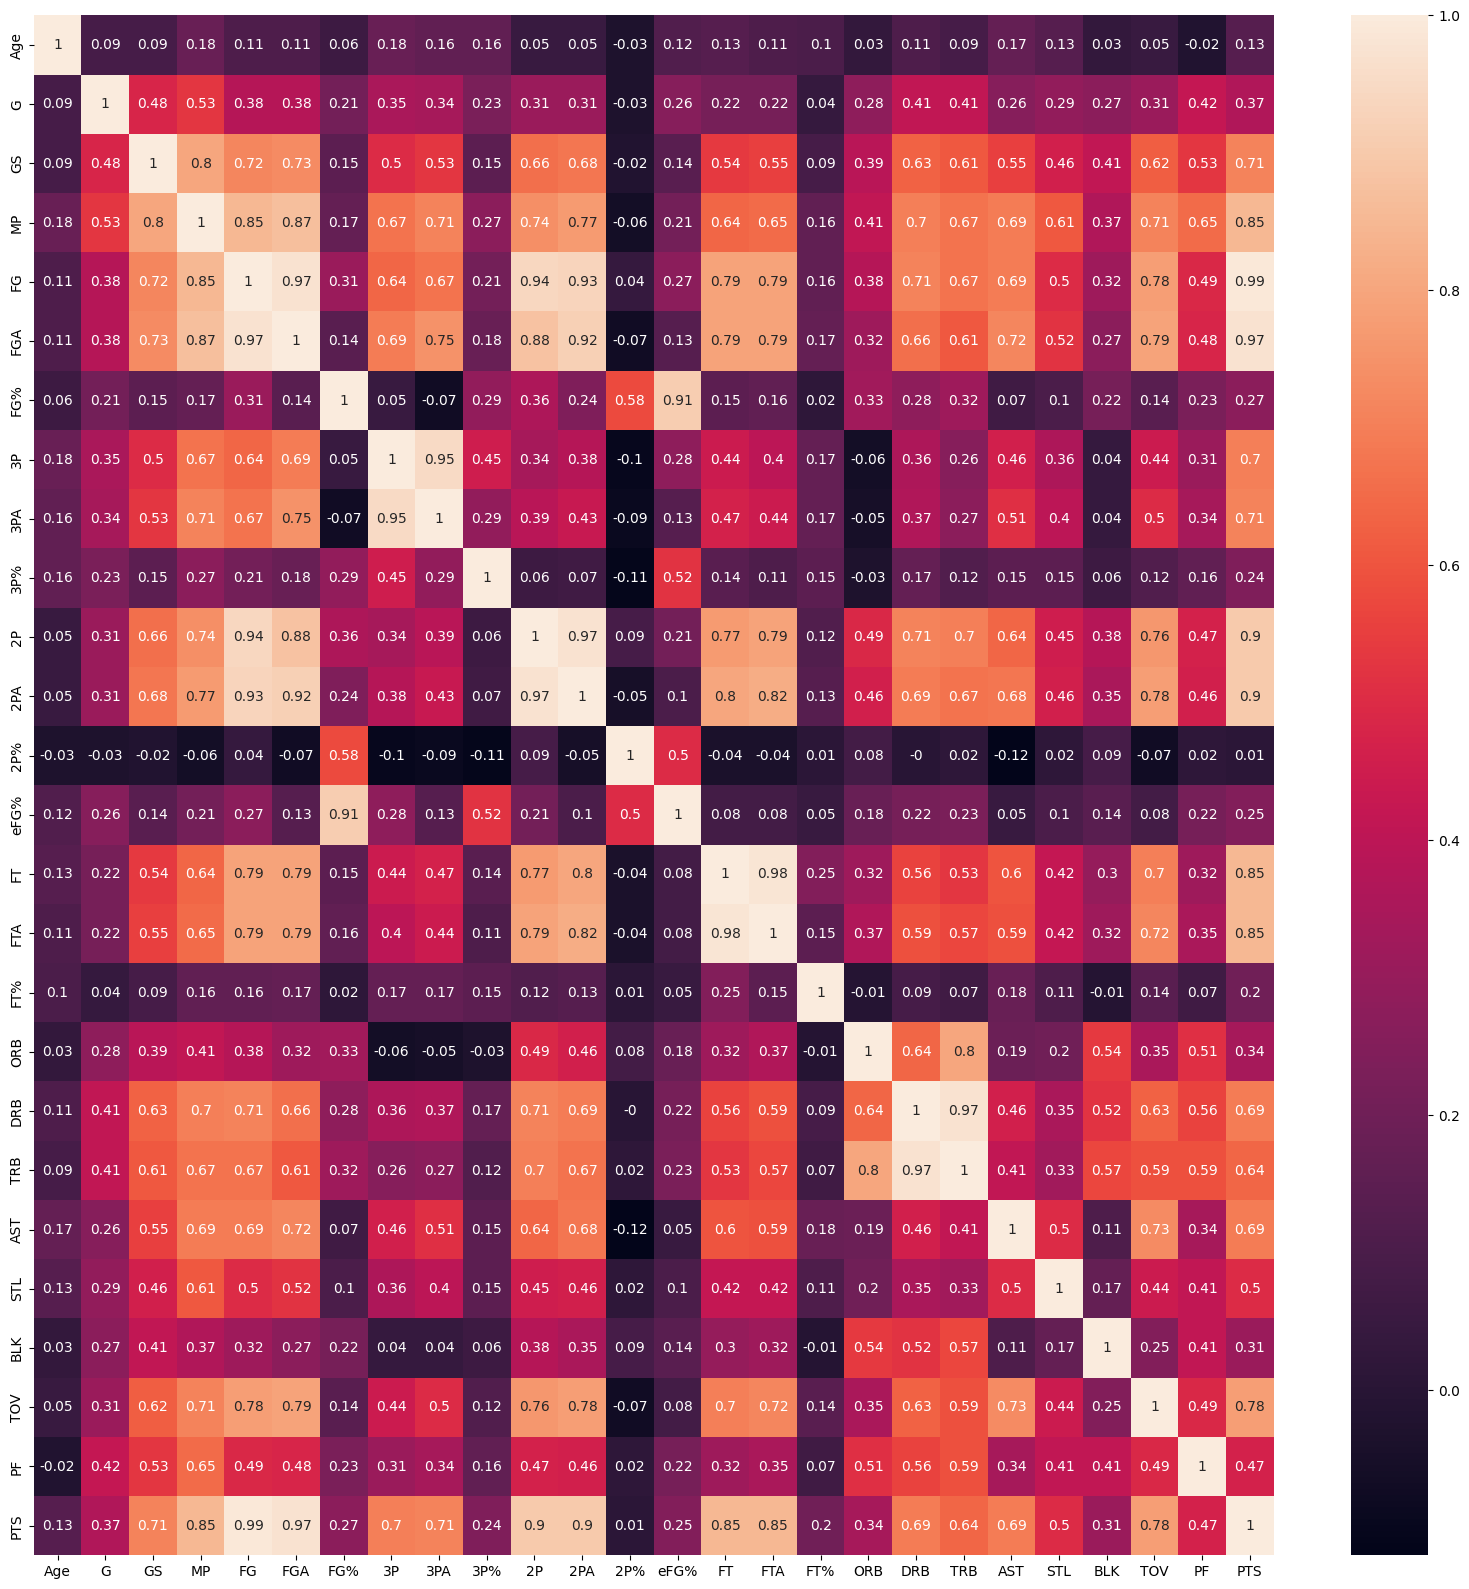

In [32]:
#plot the correlation matrix of the data and drop non numeric columns
non_num = data.drop(['Player', 'Pos', 'Tm'], axis=1)
plt.figure(figsize=(20,20))
correlation_matrix = non_num.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)


In [33]:
# Grouping data by 'Pos' and calculating mean for all columns
numeric_data = data.drop(['Player', 'Tm'], axis=1)
numeric_data = numeric_data.groupby('Pos').mean()
print(numeric_data)

           Age         G        GS         MP        FG       FGA       FG%   
Pos                                                                           
C    26.653846  8.788462  4.153846  20.315385  3.830769  7.315385  0.528077  \
PF   26.893939  8.924242  5.212121  23.321212  4.178788  8.809091  0.454621   
PG   26.671429  8.942857  4.614286  22.954286  3.997143  9.171429  0.426386   
SF   25.773333  9.026667  4.346667  21.913333  3.516000  7.752000  0.442560   
SG   25.058140  8.534884  3.697674  21.759302  3.884884  8.697674  0.432512   

           3P       3PA       3P%  ...       FT%       ORB       DRB   
Pos                                ...                                 
C    0.592308  1.792308  0.289538  ...  0.740731  1.794231  4.092308  \
PF   1.165152  3.301515  0.320621  ...  0.748561  1.066667  3.693939   
PG   1.321429  3.784286  0.321400  ...  0.786929  0.590000  2.285714   
SF   1.278667  3.648000  0.321480  ...  0.758520  0.810667  2.709333   
SG   1.443023 

For more a convenient approach, I will assume that offensive metrics are dividied into two categories; Direct scoring, and accuracy mesures. Starting with Direct Scoring Metrics:

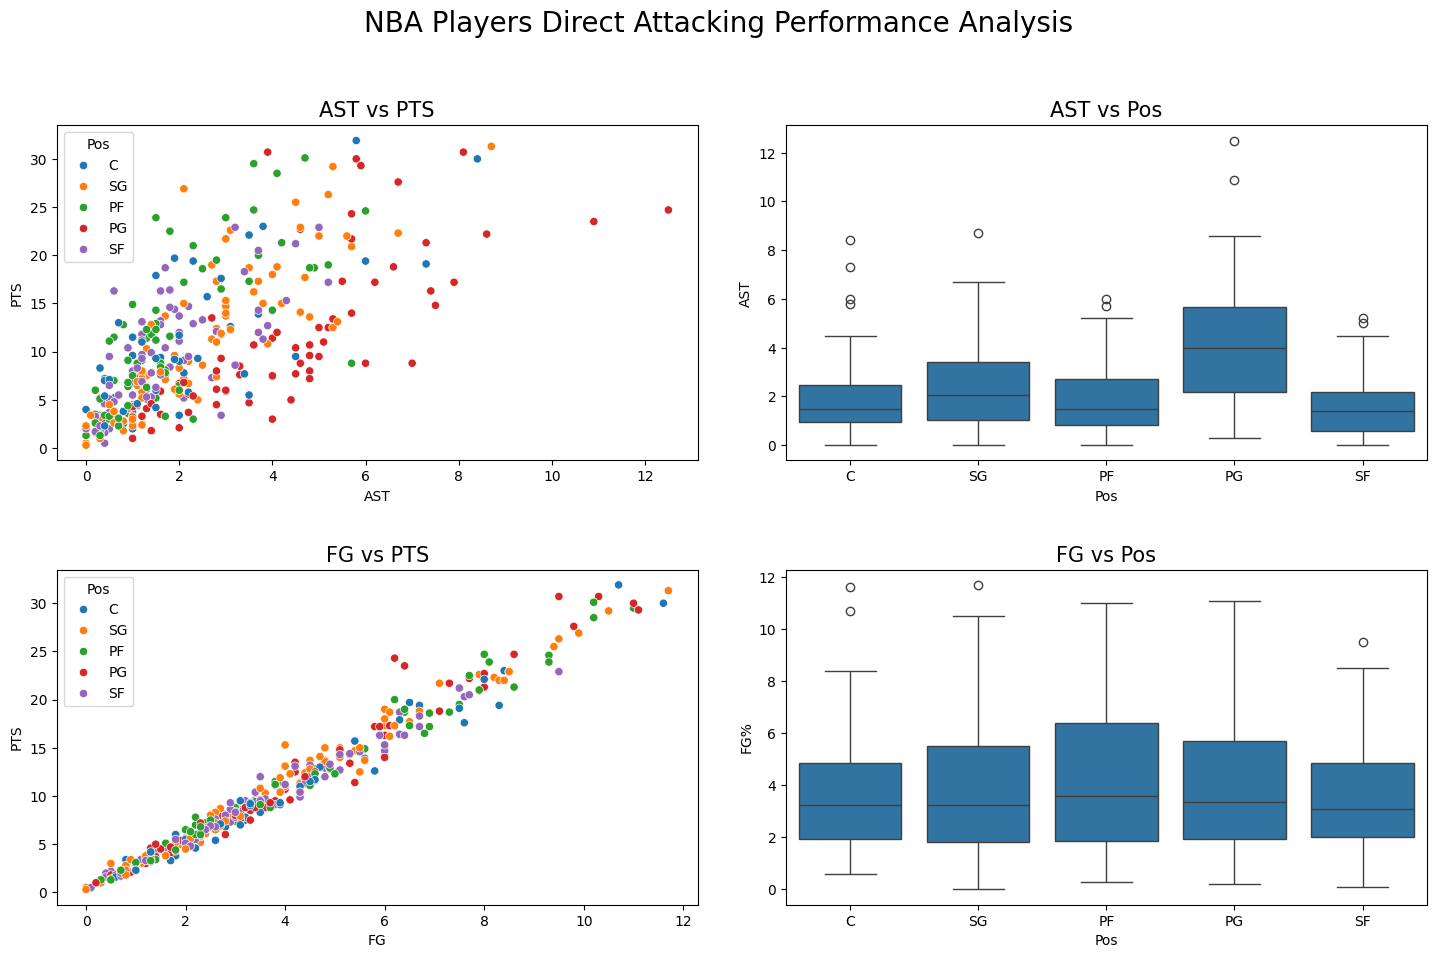

In [34]:
# offensive_metrics = data[['AST', 'FG', 'eFG%','FT%','PTS','FG%']]
# Direct Scoring metrics are  'FG', AST  

fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Adjust size as needed


# Scatter plot between 'AST' and 'PTS'
sns.scatterplot(data=data, x='AST', y='PTS', hue='Pos', ax=axs[0, 0])
axs[0, 0].set_title('AST vs PTS', fontsize=15)
axs[0, 0].set_xlabel('AST')
axs[0, 0].set_ylabel('PTS')

#boxplot of AST vs Pos
sns.boxplot(data=data, x='Pos', y='AST', ax=axs[0, 1])
axs[0, 1].set_title('AST vs Pos', fontsize=15)
axs[0, 1].set_xlabel('Pos')
axs[0, 1].set_ylabel('AST')


# Scatter plot between 'FG' and 'PTS'
sns.scatterplot(data=data, x='FG', y='PTS', hue='Pos', ax=axs[1, 0])
axs[1, 0].set_title('FG vs PTS', fontsize=15)
axs[1, 0].set_xlabel('FG')
axs[1, 0].set_ylabel('PTS')

#boxplot of FG% vs Pos
sns.boxplot(data=data, x='Pos', y='FG', ax=axs[1, 1])
axs[1, 1].set_title('FG vs Pos', fontsize=15)
axs[1, 1].set_xlabel('Pos')
axs[1, 1].set_ylabel('FG%')




fig.suptitle('NBA Players Direct Attacking Performance Analysis', fontsize=20, y=0.98)  # Adjust 'y' for better visibility

plt.tight_layout(pad=3.0)  # Adjust padding as necessary
plt.show()


Text(0.5, 0.98, 'NBA Players Scoring Accuracy Analysis')

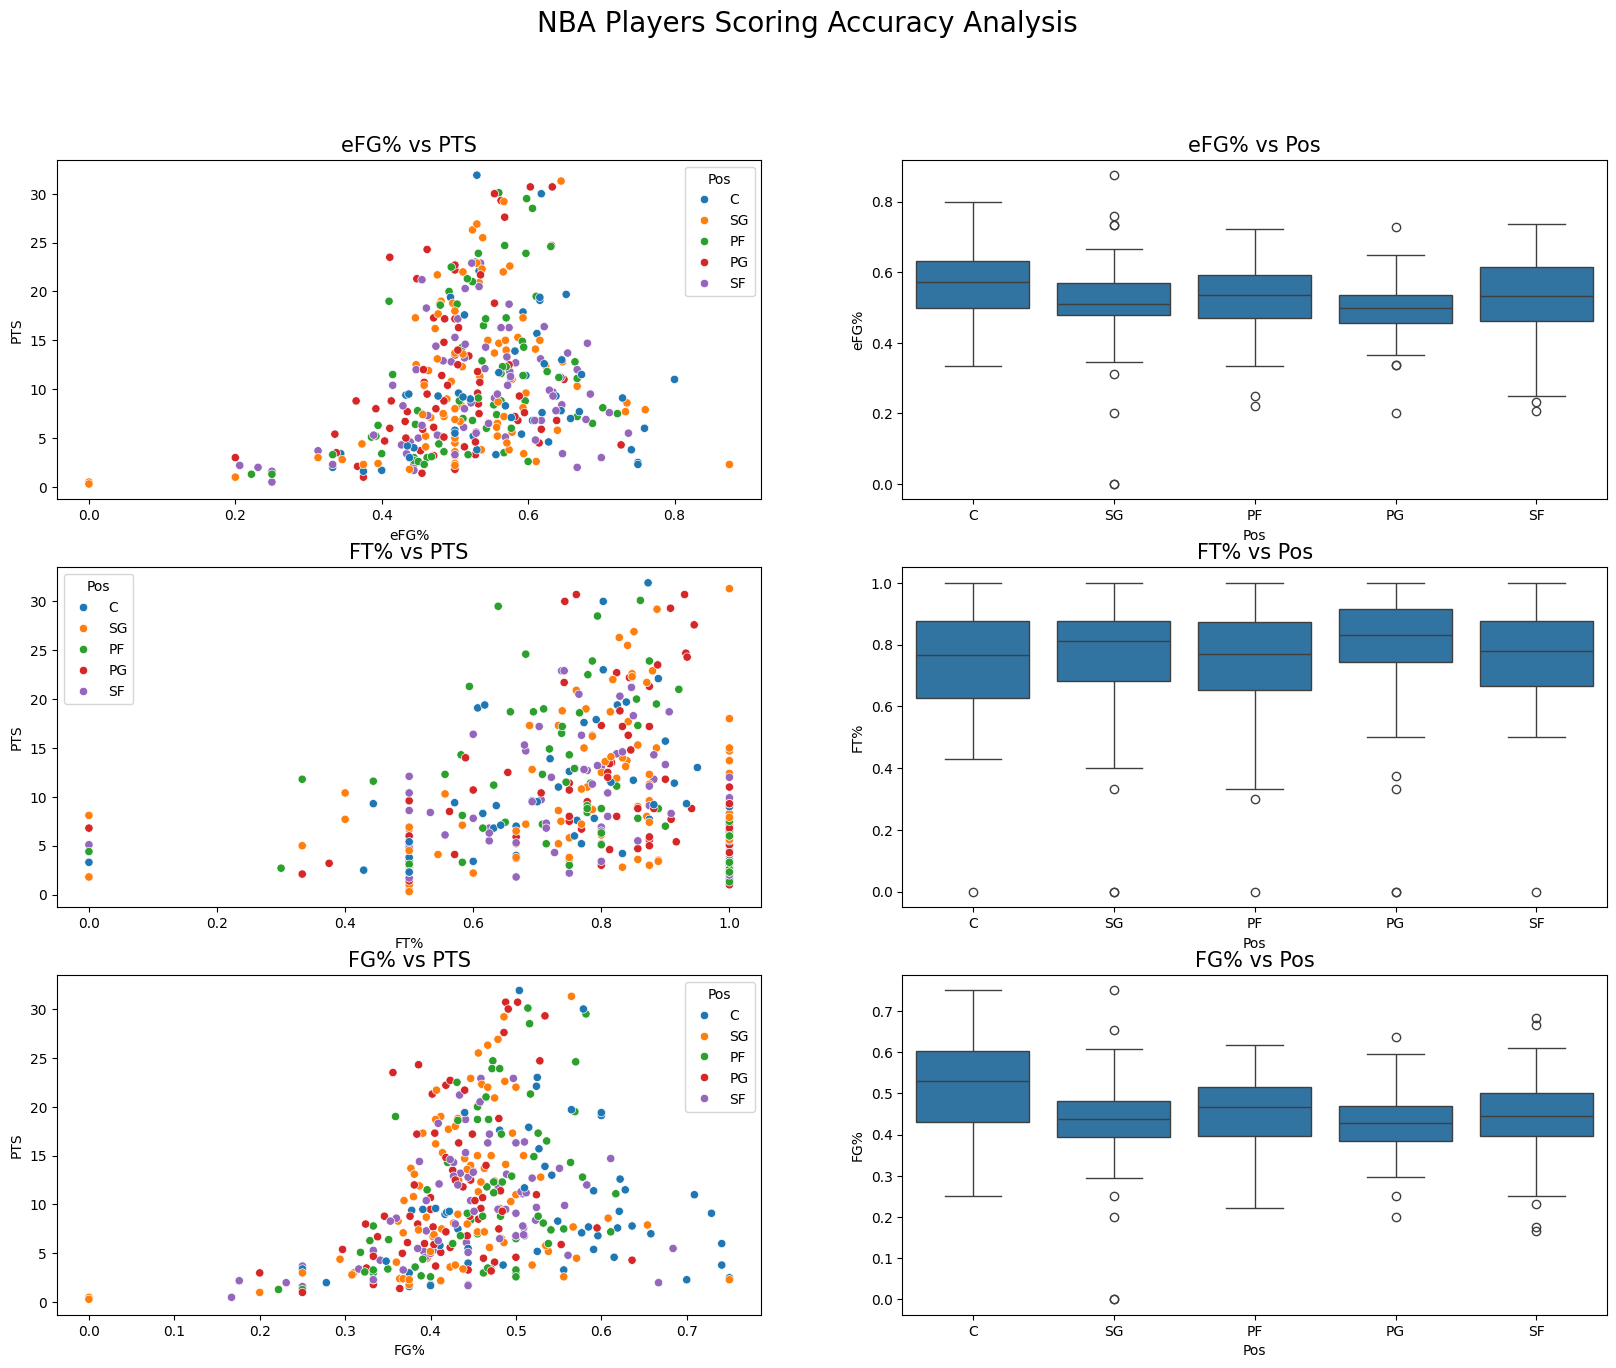

In [35]:
# Accuracy metrics are  'eFG%', 'FT%' and 'FG%'

fig, axs = plt.subplots(3, 2, figsize=(20, 15)) 

# Scatter plot between 'eFG%' and 'PTS'
sns.scatterplot(data=data, x='eFG%', y='PTS', hue='Pos', ax=axs[0, 0])
axs[0, 0].set_title('eFG% vs PTS', fontsize=15)
axs[0, 0].set_xlabel('eFG%')
axs[0, 0].set_ylabel('PTS')

#boxplot of eFG% vs Pos
sns.boxplot(data=data, x='Pos', y='eFG%', ax=axs[0, 1])
axs[0, 1].set_title('eFG% vs Pos', fontsize=15)
axs[0, 1].set_xlabel('Pos')
axs[0, 1].set_ylabel('eFG%')


# Scatter plot between 'FT%' and 'PTS'
sns.scatterplot(data=data, x='FT%', y='PTS', hue='Pos', ax=axs[1, 0])
axs[1, 0].set_title('FT% vs PTS', fontsize=15)
axs[1, 0].set_xlabel('FT%')
axs[1, 0].set_ylabel('PTS')

#boxplot of FT% vs Pos
sns.boxplot(data=data, x='Pos', y='FT%', ax=axs[1, 1])
axs[1, 1].set_title('FT% vs Pos', fontsize=15)
axs[1, 1].set_xlabel('Pos')
axs[1, 1].set_ylabel('FT%')


# Scatter plot between 'FG%' and 'PTS'
sns.scatterplot(data=data, x='FG%', y='PTS', hue='Pos', ax=axs[2, 0])
axs[2, 0].set_title('FG% vs PTS', fontsize=15)
axs[2, 0].set_xlabel('FG%')
axs[2, 0].set_ylabel('PTS')

#boxplot of FG% vs Pos
sns.boxplot(data=data, x='Pos', y='FG%', ax=axs[2, 1])
axs[2, 1].set_title('FG% vs Pos', fontsize=15)
axs[2, 1].set_xlabel('Pos')
axs[2, 1].set_ylabel('FG%')


fig.suptitle('NBA Players Scoring Accuracy Analysis', fontsize=20, y=0.98) 



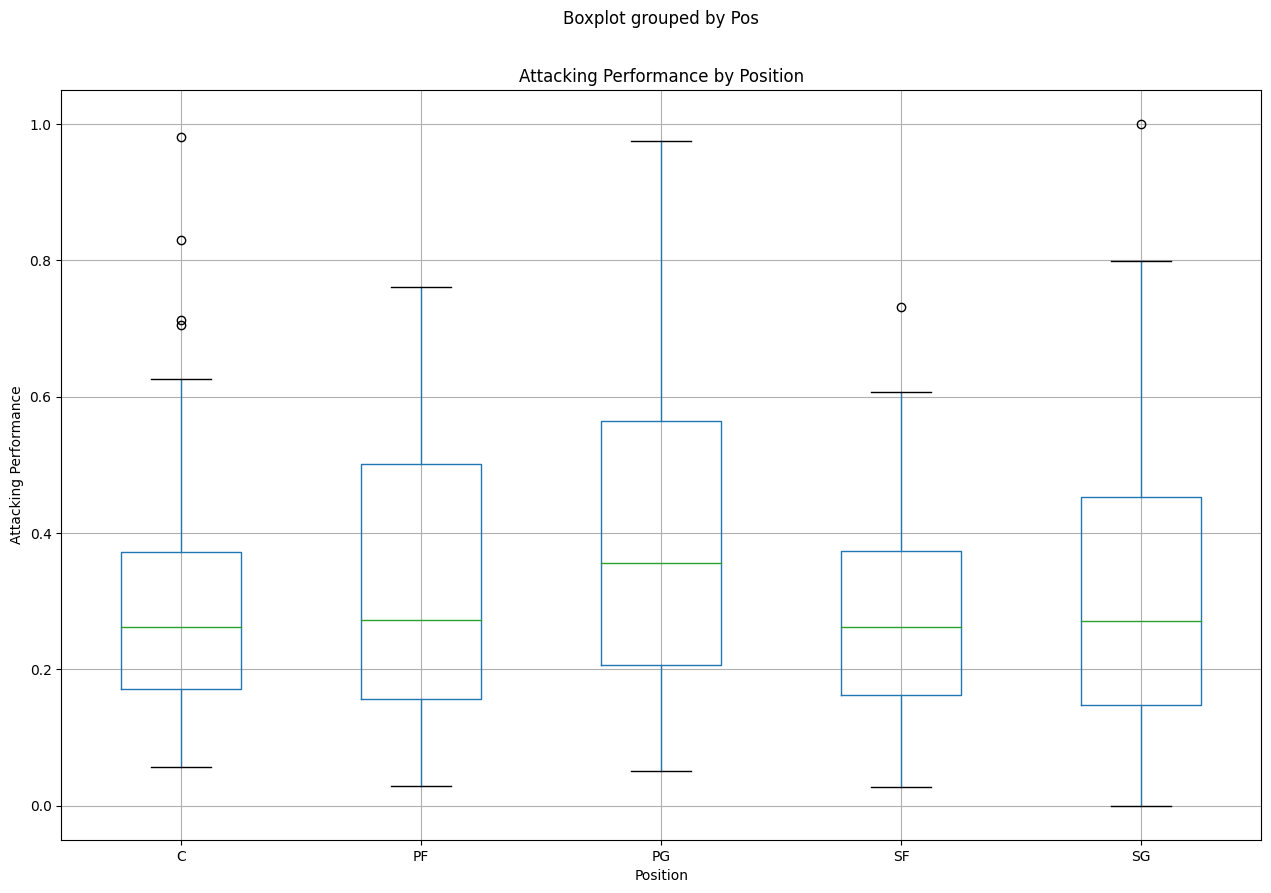

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Attacking Performance
0,Precious Achiuwa,C,24,TOR,6,0,20.0,3.2,7.3,0.432,...,2.0,4.2,6.2,1.7,0.2,0.5,1.5,2.2,7.5,0.259242
1,Bam Adebayo,C,26,MIA,10,10,34.7,8.4,16.0,0.525,...,2.3,8.2,10.5,3.8,1.4,1.4,2.9,2.3,23.0,0.625611
2,Ochai Agbaji,SG,23,UTA,11,3,17.2,1.7,4.4,0.396,...,0.8,1.9,2.7,1.0,0.4,0.6,0.6,1.3,4.5,0.144637
3,Santi Aldama,PF,23,MEM,5,0,21.0,4.6,9.6,0.479,...,0.6,4.0,4.6,1.8,0.4,0.8,1.6,1.2,11.6,0.335995
4,Nickeil Alexander-Walker,SG,25,MIN,11,2,19.9,1.9,4.8,0.396,...,0.1,1.7,1.8,2.4,0.8,0.8,0.9,1.5,5.0,0.207806


In [36]:
scaler = StandardScaler()


# Fit and transform the offensive metrics and store in a new variable, make sure not to change the original data
data_scaled = data.copy()
data_scaled[['AST', 'FG%', 'eFG%', 'FT%', 'FG']] = scaler.fit_transform(data_scaled[['AST', 'FG%', 'eFG%', 'FT%', 'FG']])
 
attacking_correlations = data_scaled[['AST', 'FG%', 'eFG%', 'FT%', 'FG']].corrwith(data_scaled['PTS'])


# Create a new attacking performance metric by combining the metrics with their correlation values as weights
data['Attacking Performance'] = (
    attacking_correlations['AST'] * data['AST'] +
    attacking_correlations['FG%'] * data['FG%'] +
    attacking_correlations['eFG%'] * data['eFG%'] +
    attacking_correlations['FT%'] * data['FT%'] + 
    attacking_correlations['FG'] * data['FG']
)

# Normalize the attacking performance metric
data['Attacking Performance'] = (
    (data['Attacking Performance'] - data['Attacking Performance'].min()) /
    (data['Attacking Performance'].max() - data['Attacking Performance'].min())
)



fig.suptitle('NBA Players Attacking Performance per Position', fontsize=20, y=0.98)  # Adjust 'y' for better visibility

# plot the pg performance metric vs the other positions
data.boxplot(column='Attacking Performance', by='Pos', figsize=(15, 10))
plt.title('Attacking Performance by Position')
plt.xlabel('Position')
plt.ylabel('Attacking Performance')
plt.show()

data.head()

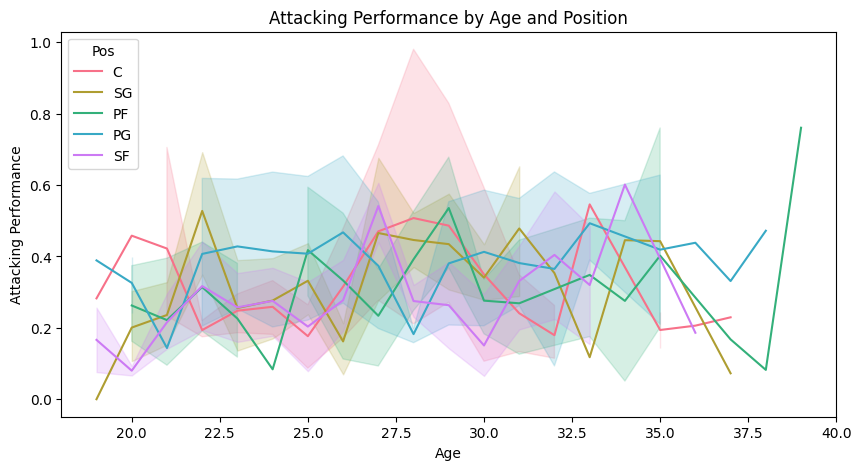

    Pos  Age  Attacking Performance
47   SG   27               1.000000
213   C   28               0.980620
158  PG   23               0.975219
204  PF   39               0.760638
194  SF   26               0.731077


In [37]:
positions = data['Pos'].unique()  # Get unique positions
palette = sns.color_palette("husl", len(positions))

# Mapping of positions to colors for clearer plot
color_map = dict(zip(positions, palette))


# Curve plot for Age vs Attacking performance by Position
plt.figure(figsize=(10, 5))
sns.lineplot(x='Age', y='Attacking Performance', hue='Pos', data=data, palette=color_map)
plt.title('Attacking Performance by Age and Position')
plt.xlabel('Age')
plt.ylabel('Attacking Performance')
plt.show()


# show a table for each positions and the age where the performance peaks around for each position
best_age = data.groupby('Pos')['Attacking Performance'].idxmax()
best_age = data.loc[best_age, ['Pos', 'Age', 'Attacking Performance']]
best_age = best_age.sort_values('Attacking Performance', ascending=False)
print(best_age)


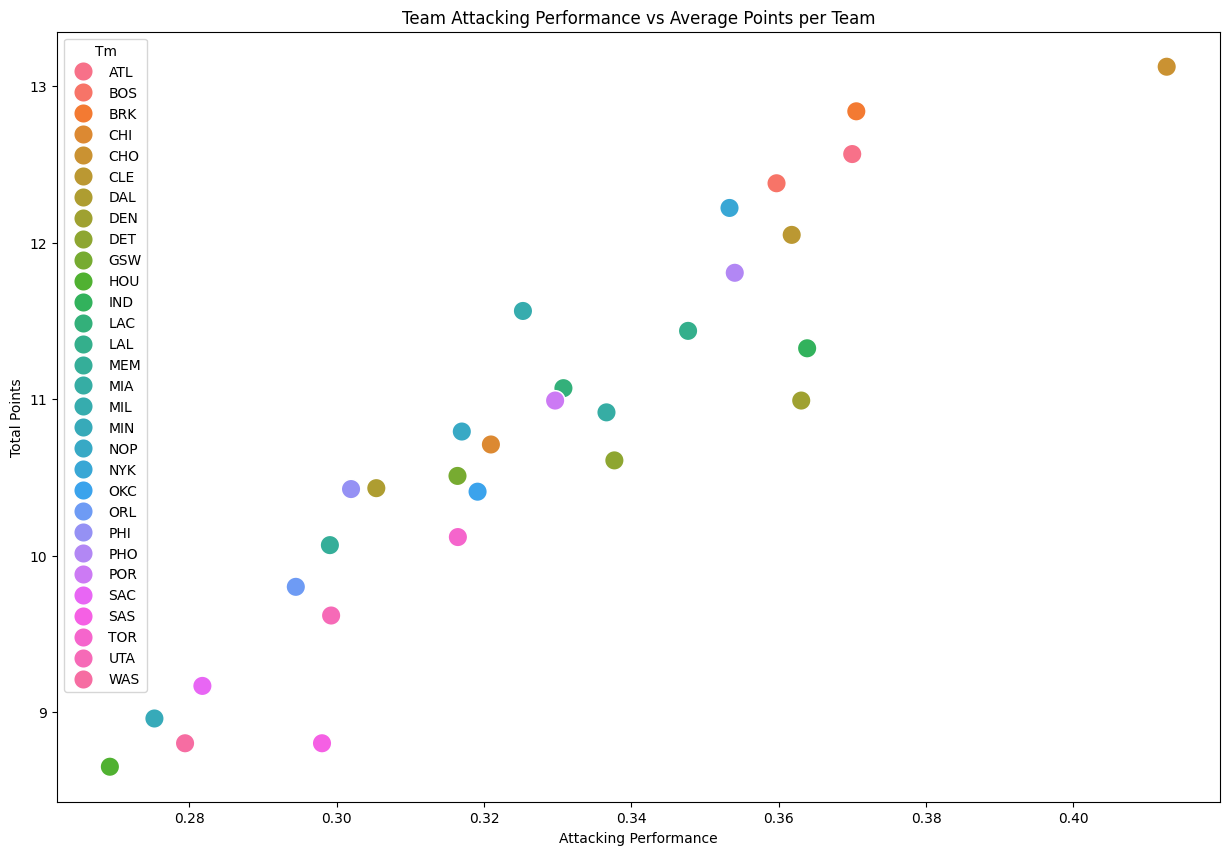

In [38]:
# Grouping data by 'Tm' and calculating sum for all columns, and make new coloums for positions and add the total No. of players of each position in each team
data_per_team = data.groupby('Tm').sum()
data_per_team['Pos'] = data.groupby('Tm')['Pos'].first()
data_per_team['No. of Players'] = data.groupby('Tm').size()

# Grouping data by 'Tm' and calculating mean for selected variables
data_per_team['Age'] = data.groupby('Tm')['Age'].mean()
data_per_team['G'] = data.groupby('Tm')['G'].mean()
data_per_team['MP'] = data.groupby('Tm')['MP'].mean()
data_per_team['GS'] = data.groupby('Tm')['GS'].mean()
data_per_team['MP'] = data.groupby('Tm')['MP'].mean()
data_per_team['eFG%'] = data.groupby('Tm')['eFG%'].mean()
data_per_team['3P%'] = data.groupby('Tm')['3P%'].mean()
data_per_team['FT%'] = data.groupby('Tm')['FT%'].mean()
data_per_team['PTS'] = data.groupby('Tm')['PTS'].mean()



data_per_team['Attacking Performance'] = data['Attacking Performance'].groupby(data['Tm']).mean()

data_per_team = data_per_team.drop(['Player'] , axis=1)
data_per_team = data_per_team.drop(['Pos'] , axis=1)



data_per_team = data_per_team.reset_index()
data_per_team.describe()

# plot teams attacking performance vs total points 
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Attacking Performance', y='PTS', data=data_per_team, hue='Tm', s=200)
plt.title('Team Attacking Performance vs Average Points per Team')
plt.xlabel('Attacking Performance')
plt.ylabel('Total Points')
plt.show()




In [39]:
# ca;culate the correlation between attacking performance and total points scored
Attack_correlation_matrix = data_per_team[['Attacking Performance', 'PTS']].corr()

print(Attack_correlation_matrix)



                       Attacking Performance       PTS
Attacking Performance               1.000000  0.930871
PTS                                 0.930871  1.000000


In [40]:
data_per_team

,Tm,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Attacking Performance,No. of Players
0,ATL,24.222222,9.444444,4.888889,24.222222,39.4,85.3,3.914,12.9,36.6,...,26.6,35.4,26.3,8.2,3.4,14.7,15.5,12.566667,0.369971,9
1,BOS,28.000000,9.400000,5.500000,24.960000,44.1,93.8,4.339,16.8,46.4,...,37.7,48.6,26.0,6.6,5.5,12.1,18.6,12.380000,0.359698,10
2,BRK,26.200000,9.200000,4.600000,25.000000,47.1,102.2,4.657,17.5,47.4,...,34.8,45.3,24.7,7.2,4.1,13.6,19.7,12.840000,0.370525,10
3,CHI,27.500000,10.700000,6.000000,24.010000,39.6,90.7,4.396,11.7,33.6,...,28.3,37.9,22.9,8.4,4.8,10.8,19.7,10.710000,0.320931,10
4,CHO,24.250000,8.500000,5.000000,27.437500,39.5,89.7,3.398,10.3,33.2,...,24.5,32.6,26.3,6.4,3.0,12.8,17.5,13.125000,0.412650,8
5,CLE,25.200000,8.500000,4.900000,25.660000,43.9,96.8,4.296,13.3,39.7,...,34.6,43.9,27.3,8.9,5.3,15.3,21.8,12.050000,0.361756,10
6,DAL,26.615385,10.076923,4.615385,20.646154,47.4,99.3,6.235,18.8,47.7,...,36.2,47.0,29.8,7.0,4.8,13.2,20.3,10.430769,0.305381,13
7,DEN,25.545455,9.909091,5.000000,22.909091,47.1,94.2,5.389,12.2,34.4,...,34.5,44.8,31.8,7.6,6.4,13.1,18.7,10.990909,0.363050,11
8,DET,23.083333,9.333333,5.000000,22.316667,47.7,100.7,5.904,12.2,33.0,...,38.6,53.4,31.5,6.3,6.7,18.8,27.6,10.608333,0.337690,12
9,GSW,29.181818,10.272727,4.454545,21.036364,41.0,93.8,4.744,15.2,42.8,...,29.3,40.2,27.4,8.1,3.1,15.1,19.8,10.509091,0.316398,11


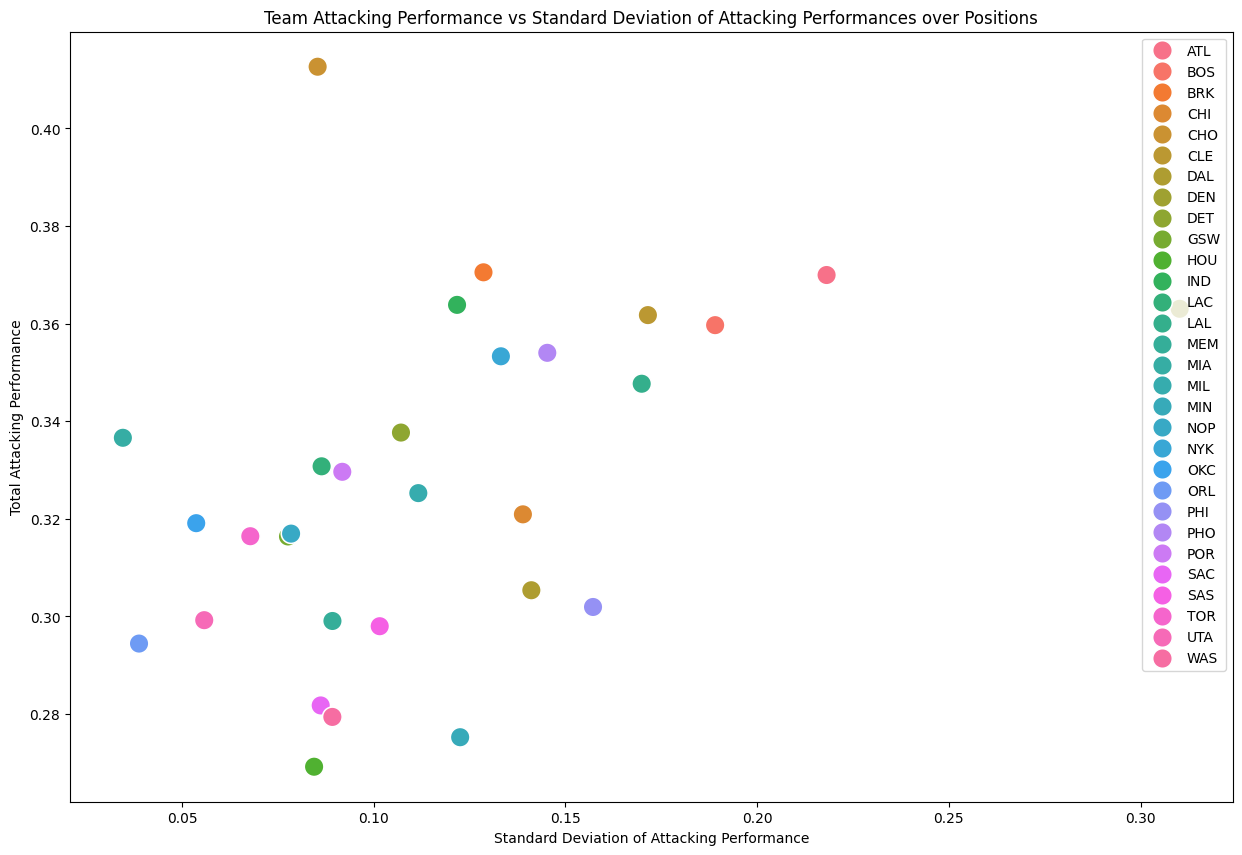

,Attacking Performance,Coefficient of Variation
Attacking Performance,1.000000,0.438197
Coefficient of Variation,0.438197,1.000000


In [41]:
numeric_dataf = data.drop(['Player'], axis=1)
metrics_columns4Team = [ 'Attacking Performance']
team_dataframes = {}

#Assign a dataframe to each team, where the rows are the positions and the columns are the metrics
for team in data_per_team['Tm']:
    team_dataframes[team] = pd.DataFrame(columns=metrics_columns4Team)
    for position in data['Pos'].unique():
        team_dataframes[team].loc[position] = numeric_dataf[(numeric_dataf['Tm'] == team) & (numeric_dataf['Pos'] == position)][metrics_columns4Team].mean()

# Some teams have missing value for some positions, fill them with the mean of this position for all teams retrived from numeric_dataf
for team in team_dataframes.keys():
    team_dataframes[team].fillna(numeric_dataf[numeric_dataf['Pos'] == team_dataframes[team].index[0]][metrics_columns4Team].mean().values[0], inplace=True)

# calculate the std of the attacking performance for each team, and store them in a disinct dictionaries 
Att_Team_stds = {}
for team in team_dataframes.keys():
    Att_Team_stds[team] = team_dataframes[team].std().values[0]
    
# store the teams total attacking performance  in a dict with the team name as the key
team_total_points = {}
for team in team_dataframes.keys():
    team_total_points[team] = data_per_team[data_per_team['Tm'] == team]['Attacking Performance'].values[0]



# Scatter plot for Total attacking performance vs coffetients of variation of attacking performance over positions for each team 
plt.figure(figsize=(15, 10))
sns.scatterplot(x=list(Att_Team_stds.values()), y=list(team_total_points.values()), hue=list(team_total_points.keys()), s=200)
plt.title('Team Attacking Performance vs Standard Deviation of Attacking Performances over Positions')
plt.xlabel('Standard Deviation of Attacking Performance')
plt.ylabel('Total Attacking Performance')
plt.show()

# calculate the correlation between the total attacking performance and the coffecient of variation of attacking performance
Attack_correlation_matrix = pd.DataFrame(list(Att_Team_stds.values()), list(team_total_points.values())).reset_index()
Attack_correlation_matrix.columns = ['Attacking Performance', 'Coefficient of Variation']
Attack_correlation_matrix.corr()







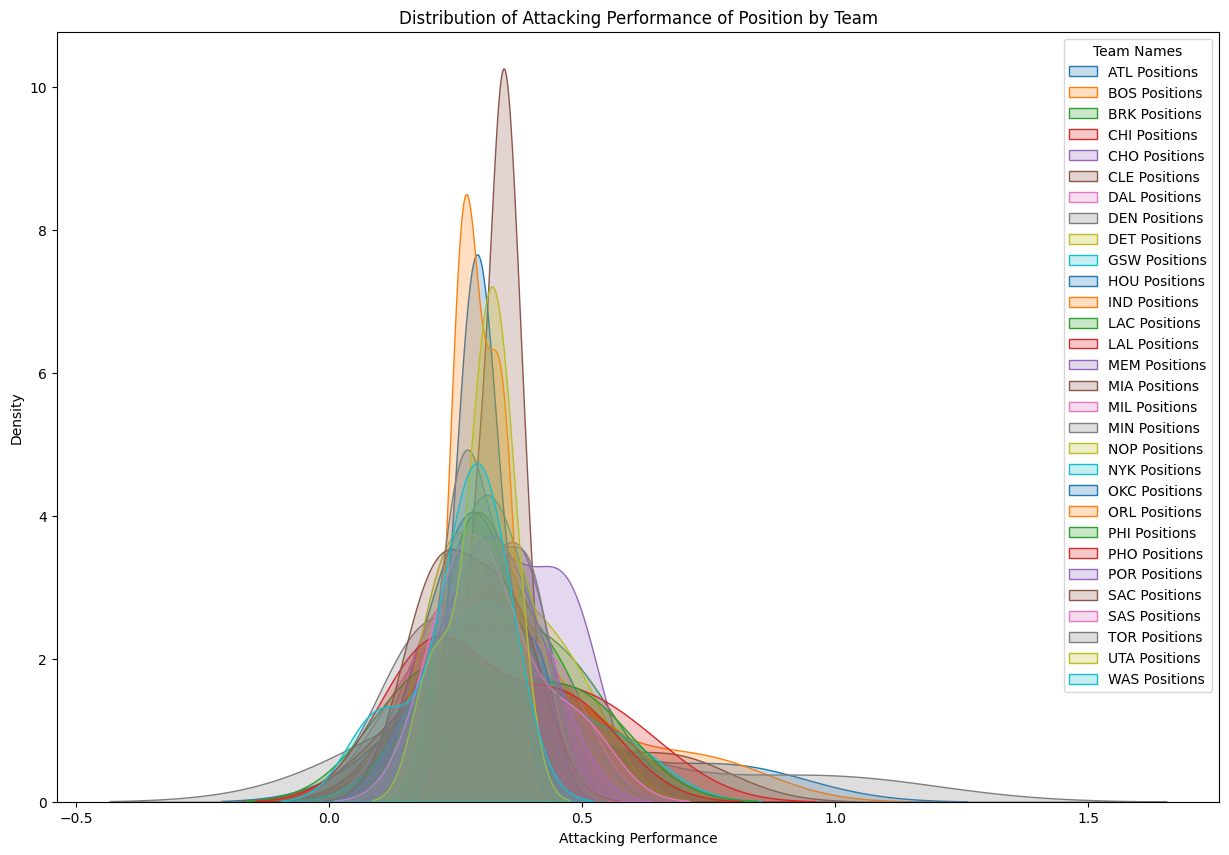

In [42]:
plt.figure(figsize=(15, 10))

# Iterate over each team and plot the KDE for Attacking Performance
for team, df in team_dataframes.items():
    if 'Attacking Performance' in df.columns:
        sns.kdeplot(
            data=df['Attacking Performance'],  
            fill=True, 
            label=f"{team} Positions"  
        )

plt.title('Distribution of Attacking Performance over Position by Team')
plt.xlabel('Attacking Performance')
plt.ylabel('Density')
plt.legend(title='Team Names')
plt.show()





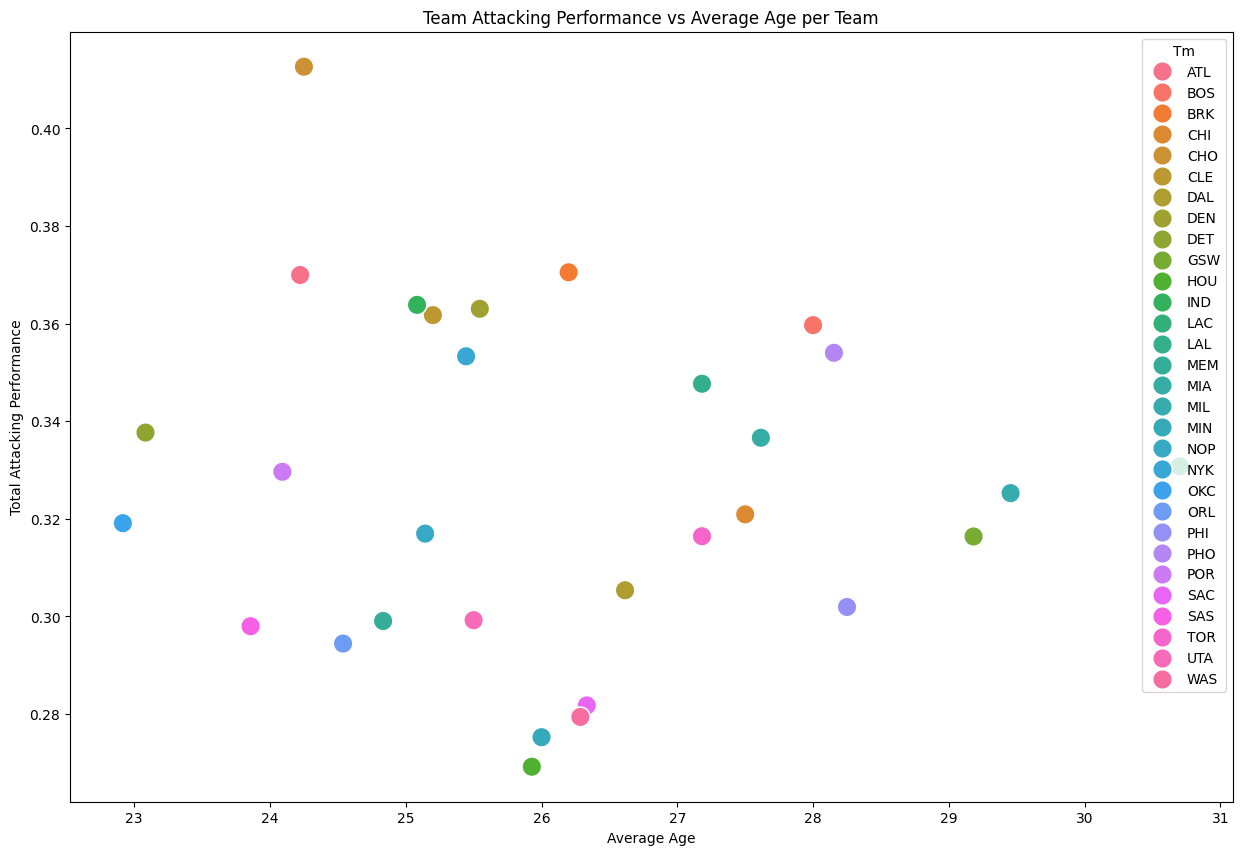

                       Attacking Performance       Age
Attacking Performance               1.000000 -0.070435
Age                                -0.070435  1.000000


In [55]:
# check how average age of teams is related to the total attacking performance of the team
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Age', y='Attacking Performance', data=data_per_team, hue='Tm', s=200)
plt.title('Team Attacking Performance vs Average Age per Team')
plt.xlabel('Average Age')
plt.ylabel('Total Attacking Performance')
plt.show()

# calculate the correlation between the total attacking performance and the average age of the team
Attack_correlation_matrix = data_per_team[['Attacking Performance', 'Age']].corr()

print(Attack_correlation_matrix)


# C. Inferential Statistics

## I. Average Age of Every Position 

In [44]:
# Calculate Average Age for Each Position
avg_age = data.groupby('Pos')['Age'].agg(['mean', 'std', 'count']).reset_index()
avg_age.rename(columns={'mean': 'Average Age', 'std': 'Std Dev', 'count': 'Sample Size'}, inplace=True)

# Z-score for 95% confidence
z = 1.96

# Calculate the Confidence Intervals
avg_age['Lower CI'] = avg_age['Average Age'] - z * (avg_age['Std Dev'] / np.sqrt(avg_age['Sample Size']))
avg_age['Upper CI'] = avg_age['Average Age'] + z * (avg_age['Std Dev'] / np.sqrt(avg_age['Sample Size']))

# Format the DataFrame for better readability
avg_age_formatted = avg_age[['Pos', 'Average Age', 'Lower CI', 'Upper CI', 'Std Dev', 'Sample Size']]
avg_age_formatted = avg_age_formatted.sort_values(by='Average Age', ascending=False)  # Sort by average age

# Displaying results
print("Average Age of Each Position with Confidence Intervals and Descriptive Statistics:")
print(avg_age_formatted.to_string(index=False))

Average Age of Each Position with Confidence Intervals and Descriptive Statistics:
Pos  Average Age  Lower CI  Upper CI  Std Dev  Sample Size
 PF    26.893939 25.678304 28.109575 5.038708           66
 PG    26.671429 25.586674 27.756183 4.630464           70
  C    26.653846 25.475970 27.831723 4.333565           52
 SF    25.773333 24.859242 26.687425 4.038910           75
 SG    25.058140 24.228192 25.888087 3.926845           86


## II. Mean Individual Scored Points per Position

In [45]:
# Calculate Average Points for Each Position
avg_points = data.groupby('Pos')['PTS'].agg(['mean', 'std', 'count']).reset_index()
avg_points.rename(columns={'mean': 'Average Points', 'std': 'Std Dev', 'count': 'Sample Size'}, inplace=True)

# Z-score for 95% confidence
z = 1.96

# Calculate the Confidence Intervals
avg_points['Lower CI'] = avg_points['Average Points'] - z * (avg_points['Std Dev'] / np.sqrt(avg_points['Sample Size']))
avg_points['Upper CI'] = avg_points['Average Points'] + z * (avg_points['Std Dev'] / np.sqrt(avg_points['Sample Size']))

# Format the DataFrame for better readability
avg_points_formatted = avg_points[['Pos', 'Average Points', 'Lower CI', 'Upper CI', 'Std Dev', 'Sample Size']]
avg_points_formatted = avg_points_formatted.sort_values(by='Average Points', ascending=False)  # Sort by average points

# Displaying results
print("Average Points of Each Position with Confidence Intervals and Descriptive Statistics:")
print(avg_points_formatted.to_string(index=False))



Average Points of Each Position with Confidence Intervals and Descriptive Statistics:
Pos  Average Points  Lower CI  Upper CI  Std Dev  Sample Size
 PF       11.492424  9.627056 13.357793 7.731799           66
 PG       11.125714  9.256501 12.994927 7.979061           70
 SG       10.891860  9.321428 12.462293 7.430402           86
  C       10.061538  8.148188 11.974889 7.039473           52
 SF        9.526667  8.252647 10.800686 5.629251           75


## III. Mean of the Attacking Performance per position

In [46]:
# Calculate Average Attacking Performance for Each Position
avg_attacking = data.groupby('Pos')['Attacking Performance'].agg(['mean', 'std', 'count']).reset_index()
avg_attacking.rename(columns={'mean': 'Average Attacking Performance', 'std': 'Std Dev', 'count': 'Sample Size'}, inplace=True)

# Z-score for 95% confidence
z = 1.96

# Calculate the Confidence Intervals
avg_attacking['Lower CI'] = avg_attacking['Average Attacking Performance'] - z * (avg_attacking['Std Dev'] / np.sqrt(avg_attacking['Sample Size']))
avg_attacking['Upper CI'] = avg_attacking['Average Attacking Performance'] + z * (avg_attacking['Std Dev'] / np.sqrt(avg_attacking['Sample Size']))

# Format the DataFrame for better readability
avg_attacking_formatted = avg_attacking[['Pos', 'Average Attacking Performance', 'Lower CI', 'Upper CI', 'Std Dev', 'Sample Size']]
avg_attacking_formatted = avg_attacking_formatted.sort_values(by='Average Attacking Performance', ascending=False)  # Sort by average attacking performance

# Displaying results
print("Average Attacking Performance of Each Position with Confidence Intervals and Descriptive Statistics:")
print(avg_attacking_formatted.to_string(index=False))


Average Attacking Performance of Each Position with Confidence Intervals and Descriptive Statistics:
Pos  Average Attacking Performance  Lower CI  Upper CI  Std Dev  Sample Size
 PG                       0.394743  0.340893  0.448592 0.229867           70
 SG                       0.321351  0.276836  0.365865 0.210617           86
 PF                       0.319437  0.270614  0.368259 0.202366           66
  C                       0.305990  0.251580  0.360400 0.200181           52
 SF                       0.274897  0.238914  0.310879 0.158989           75


## IV. Proportion of Field Goals of Field Goals Attempts

In [58]:
import pandas as pd
import numpy as np
from scipy.stats import norm


# Summing field goals made and attempted by position
fg_summary = data.groupby('Pos').agg({
    'FG': 'sum',  # Sum of field goals made
    'FGA': 'sum'  # Sum of field goals attempted
}).reset_index()

# Calculate FG proportion for each position
fg_summary['FG%'] = fg_summary['FG'] / fg_summary['FGA']

# Calculate the standard error of the proportion (FG%)
# Standard error for proportion: sqrt(p * (1 - p) / n)
fg_summary['Std Error'] = np.sqrt((fg_summary['FG%'] * (1 - fg_summary['FG%'])) / fg_summary['FGA'])

# Z-score for 95% confidence
z_score = 1.96  # two-tailed; hence 0.975 instead of 0.95

# Calculate the confidence intervals
fg_summary['Lower CI'] = fg_summary['FG%'] - z_score * fg_summary['Std Error']
fg_summary['Upper CI'] = fg_summary['FG%'] + z_score * fg_summary['Std Error']

# Display the results
print(fg_summary[['Pos', 'FG%', 'Lower CI', 'Upper CI', 'Std Error', 'FGA']])


  Pos       FG%  Lower CI  Upper CI  Std Error    FGA
0   C  0.523659  0.473469  0.573850   0.025607  380.4
1  PF  0.474372  0.433782  0.514962   0.020709  581.4
2  PG  0.435826  0.397468  0.474183   0.019570  642.0
3  SF  0.453560  0.413093  0.494028   0.020647  581.4
4  SG  0.446658  0.411030  0.482286   0.018177  748.0


## V. Standard Deviation of Attacking Performance between Positions

In [48]:
import pandas as pd
import numpy as np
from scipy.stats import chi2

# Assuming 'data' is your DataFrame containing the columns 'Pos' and 'Attacking Performance' for each player

# Calculate the mean attacking performance for each position
mean_performance = data.groupby('Pos')['Attacking Performance'].mean()

# Calculate the overall standard deviation across these mean performances
overall_std = mean_performance.std()

# The number of positions, assuming these are PG, SG, SF, PF, C
n = mean_performance.count()

# Calculate the variance of attacking performance across positions
variance = mean_performance.var()

# Degrees of freedom for the chi-squared distribution
df = n - 1

# Critical values from the chi-squared distribution for the 95% confidence interval
chi2_lower = chi2.ppf(0.025, df)
chi2_upper = chi2.ppf(0.975, df)

# Calculate the confidence intervals for the variance
variance_ci_lower = (df * variance) / chi2_upper
variance_ci_upper = (df * variance) / chi2_lower

# Calculate the confidence intervals for the standard deviation
std_ci_lower = np.sqrt(variance_ci_lower)
std_ci_upper = np.sqrt(variance_ci_upper)

print(f"Overall Standard Deviation of Attacking Performance: {overall_std:.4f}")
print(f"95% Confidence Interval for Standard Deviation: ({std_ci_lower:.4f}, {std_ci_upper:.4f})")


Overall Standard Deviation of Attacking Performance: 0.0441
95% Confidence Interval for Standard Deviation: (0.0264, 0.1266)


## VI. Difference between Field Goals Percentage 

In [49]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Assuming 'data' is your DataFrame containing the fields 'Pos', 'FG' (Field Goals Made), and 'FGA' (Field Goals Attempted)

# Filter data for PG and SG positions
data_pg = data[data['Pos'] == 'PG']
data_sg = data[data['Pos'] == 'SG']

# Calculate FG% for PG
fg_percentage_pg = data_pg['FG'].sum() / data_pg['FGA'].sum()

# Calculate FG% for SG
fg_percentage_sg = data_sg['FG'].sum() / data_sg['FGA'].sum()

# Calculate the sample sizes for PG and SG
n_pg = data_pg['FGA'].sum()
n_sg = data_sg['FGA'].sum()

# Difference in proportions
diff_proportions = fg_percentage_pg - fg_percentage_sg

# Standard error of the difference in proportions
std_error_diff = np.sqrt((fg_percentage_pg * (1 - fg_percentage_pg) / n_pg) + 
                         (fg_percentage_sg * (1 - fg_percentage_sg) / n_sg))

# Z-score for 95% confidence interval
z_score = norm.ppf(0.975)  # two-tailed; hence 0.975 instead of 0.95

# Confidence intervals for the difference
ci_lower = diff_proportions - z_score * std_error_diff
ci_upper = diff_proportions + z_score * std_error_diff

print(f"Difference in FG% between PG and SG: {diff_proportions:.4f}")
print(f"95% Confidence Interval for the difference: ({ci_lower:.4f}, {ci_upper:.4f})")


Difference in FG% between PG and SG: -0.0108
95% Confidence Interval for the difference: (-0.0632, 0.0415)


In [50]:
from scipy.stats import norm

# Assuming 'data' is your DataFrame containing the fields 'Pos', 'ORB' (Offensive Rebounds), and 'DRB' (Defensive Rebounds)

# Calculate total offensive and defensive rebounds by position
rebound_totals = data.groupby('Pos').agg({
    'ORB': 'sum',  # Total offensive rebounds
    'DRB': 'sum',  # Total defensive rebounds
    'TRB': 'sum'  # Total rebounds (if not present, use 'ORB' + 'DRB')
}).reset_index()

# Calculate proportions of offensive and defensive rebounds
rebound_totals['Prop_ORB'] = rebound_totals['ORB'] / rebound_totals['TRB']
rebound_totals['Prop_DRB'] = rebound_totals['DRB'] / rebound_totals['TRB']

# Calculate the difference in proportions
rebound_totals['Diff_Prop'] = rebound_totals['Prop_ORB'] - rebound_totals['Prop_DRB']

# Calculate the standard error of the difference in proportions
rebound_totals['Std_Error_Diff'] = np.sqrt(
    (rebound_totals['Prop_ORB'] * (1 - rebound_totals['Prop_ORB']) / rebound_totals['ORB']) + 
    (rebound_totals['Prop_DRB'] * (1 - rebound_totals['Prop_DRB']) / rebound_totals['DRB'])
)

# Z-score for 95% confidence interval
z_score = norm.ppf(0.975)  # two-tailed; hence 0.975 instead of 0.95

# Calculate confidence intervals for the difference in proportions
rebound_totals['Lower_CI'] = rebound_totals['Diff_Prop'] - z_score * rebound_totals['Std_Error_Diff']
rebound_totals['Upper_CI'] = rebound_totals['Diff_Prop'] + z_score * rebound_totals['Std_Error_Diff']

# Output the results
print(rebound_totals[['Pos', 'Diff_Prop', 'Lower_CI', 'Upper_CI', 'Std_Error_Diff']])


  Pos  Diff_Prop  Lower_CI  Upper_CI  Std_Error_Diff
0   C  -0.390395 -0.502421 -0.278370        0.057157
1  PF  -0.552053 -0.662625 -0.441482        0.056415
2  PG  -0.590841 -0.728983 -0.452699        0.070482
3  SF  -0.540417 -0.661045 -0.419790        0.061546
4  SG  -0.599920 -0.724177 -0.475662        0.063398


# Hypothesis 1: 

In [59]:
import pandas as pd
from scipy.stats import pearsonr


team_data = data_per_team.copy()

# Check for missing values in the relevant columns to avoid runtime errors.
if team_data['Attacking Performance'].isnull().any() or team_data['PTS'].isnull().any():
    print("Data contains missing values. Please handle them before computing correlation.")
else:
    # Calculate the Pearson correlation coefficient and p-value
    correlation, p_value = pearsonr(team_data['Attacking Performance'], team_data['PTS'])

    # Print the results
    print(f"Pearson Correlation Coefficient: {correlation:.4f}")
    print(f"P-value: {p_value:.4g}") 

    # Decision based on p-value
    if p_value < 0.05:
        print("Reject the null hypothesis: There is a significant positive correlation.")
    else:
        print("Fail to reject the null hypothesis: There is no significant correlation.")


Pearson Correlation Coefficient: 0.9309
P-value: 9.103e-14
Reject the null hypothesis: There is a significant positive correlation.


# Hypothesis 2: 

In [52]:
from scipy.stats import pearsonr

# Extract PG Attacking Performance and Team Points
pg_performance = []
team_points = []

for team, df in team_dataframes.items():
    # Check if 'PG' is a row in the team's DataFrame and if 'Team Points' exists for the team
    if 'PG' in df.index and team in data_per_team['Tm'].values:
        pg_performance.append(df.loc['PG', 'Attacking Performance'])
        team_points.append(data_per_team.loc[data_per_team['Tm'] == team, 'PTS'].values[0])

# Convert lists to numpy arrays for correlation calculation
pg_performance = np.array(pg_performance)
team_points = np.array(team_points)

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(pg_performance, team_points)

# Print the results
print("Pearson Correlation Coefficient:", correlation)
print("P-value:", p_value)

# Decision based on p-value
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant positive correlation.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation.")

Pearson Correlation Coefficient: 0.2922543430927282
P-value: 0.1170766506945151
Fail to reject the null hypothesis: There is no significant correlation.


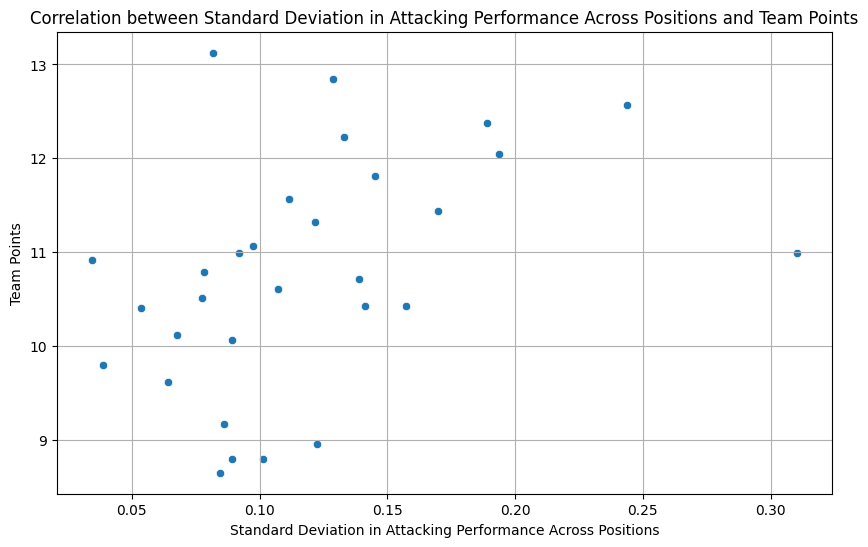

Pearson Correlation Coefficient: 0.41570041911982963
P-value: 0.0223339683319408
Reject the null hypothesis: There is a significant correlation.


In [53]:

data_per_team.set_index('Tm', inplace=True)

team_dataframes = {}
for team in data_per_team.index:
    team_df = data[data['Tm'] == team]
    # Group by 'Pos' and calculate mean 'Attacking Performance' for each position
    team_df = team_df.groupby('Pos')['Attacking Performance'].mean().reset_index()
    team_dataframes[team] = team_df

# Initialize dictionaries to hold the std of attacking performance and team points.
std_scores = {}
team_points = {}

# Loop through each team's DataFrame to calculate the standard deviation and fetch team points.
for team, df in team_dataframes.items():
    if not df.empty:
        std = df['Attacking Performance'].std(ddof=1)  # Calculating standard deviation
        std_scores[team] = std
        team_points[team] = data_per_team.loc[team, 'PTS']

std_list = list(std_scores.values())
points_list = list(team_points.values())

# Calculate the Pearson correlation coefficient and p-value between std and points.
correlation, p_value = pearsonr(std_list, points_list)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=std_list, y=points_list)
plt.title('Correlation between Standard Deviation in Attacking Performance Across Positions and Team Points')
plt.xlabel('Standard Deviation in Attacking Performance Across Positions')
plt.ylabel('Team Points')
plt.grid(True)  # Adding grid for better readability
plt.show()

# Output the correlation results
print("Pearson Correlation Coefficient:", correlation)
print("P-value:", p_value)

# Decision based on p-value
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation.")


In [54]:
from scipy import stats

# Filter data for PGs and Cs
pg_performance = data[data['Pos'] == 'PG']['Attacking Performance']
c_performance = data[data['Pos'] == 'C']['Attacking Performance']

# Perform a two-sample t-test (assume unequal variances)
t_stat, p_value = stats.ttest_ind(pg_performance, c_performance, equal_var=False, alternative='greater')

# Output the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Decision based on p-value
if p_value < 0.05:
    print("Reject the null hypothesis: PGs have a significantly higher average attacking performance than Cs.")
else:
    print("Fail to reject the null hypothesis: No significant difference in attacking performance between PGs and Cs.")


T-statistic: 2.2723686092401136
P-value: 0.012445844088512313
Reject the null hypothesis: PGs have a significantly higher average attacking performance than Cs.
